# Loading Dataset 

In [1]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 

### Show columns in the dataset

In [2]:
print(X.columns)

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m',
       'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
       'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
       'adlp', 'adls', 'adlsc'],
      dtype='object')


# Loading all packages 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import sklearn.model_selection as model_selection
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression #1

In [4]:
X = X.dropna(subset=['charges'])
y = y.dropna(subset=['death'])
df = pd.concat([X, y], axis=1)

# Drop NaN values from 'charges' and 'death' columns simultaneously
df_cleaned = df.dropna(subset=['charges', 'death'])

# Separate X and y again
X = df_cleaned[['charges']]
y = df_cleaned['death']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict death on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6916620033575825
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       551
           1       0.69      1.00      0.82      1236

    accuracy                           0.69      1787
   macro avg       0.35      0.50      0.41      1787
weighted avg       0.48      0.69      0.57      1787



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [5]:
df_cleaned['charges']

0        9715.0
1       34496.0
2       41094.0
3        3075.0
4       50127.0
         ...   
9100    52870.0
9101    35377.0
9102    46564.0
9103    58439.0
9104    15604.0
Name: charges, Length: 8933, dtype: float64

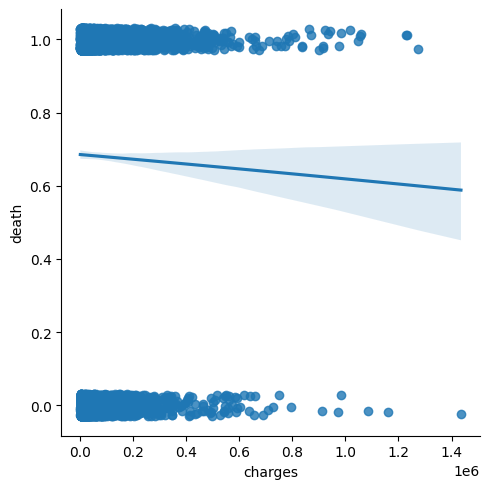

In [6]:
# plot the logistic regression line 
sns.lmplot(x="charges", y="death", data=df_cleaned, logistic=True, y_jitter=.03)
plt.show()

# Random forest 

In [7]:
# Define features and target variable
selected_features = ['dzgroup', 'age', 'sex', 'num.co', 'scoma', 'charges', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls']

# Select only the columns of interest and drop rows with missing values
df_cleaned = df_cleaned[selected_features].dropna()

# Separate features (X) and target variable (y)
X = df_cleaned[selected_features[1:]]  # Exclude 'dzgroup' from features
y = df_cleaned['dzgroup']  # or 'dzclass' depending on your target variable

# Encode categorical variables 'sex' and 'race' using LabelEncoder
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['race'] = label_encoder.fit_transform(X['race'])

# Use label encoding for the target variable 'dzgroup'
y = label_encoder.fit_transform(df_cleaned['dzgroup'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict disease groups for test data
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

/var/folders/5k/0qz1zbqx0cx5b4hzqlkt8fl00000gn/T/ipykernel_54368/265521085.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = label_encoder.fit_transform(X['sex'])
/var/folders/5k/0qz1zbqx0cx5b4hzqlkt8fl00000gn/T/ipykernel_54368/265521085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['race'] = label_encoder.fit_transform(X['race'])
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. 

Accuracy: 0.5233644859813084
              precision    recall  f1-score   support

           0       0.53      0.81      0.64        26
           1       0.49      0.74      0.59        27
           2       0.50      0.05      0.10        19
           3       0.00      0.00      0.00         7
           4       0.43      0.50      0.46         6
           6       0.86      0.50      0.63        12
           7       0.56      0.50      0.53        10

    accuracy                           0.52       107
   macro avg       0.48      0.44      0.42       107
weighted avg       0.51      0.52      0.47       107



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


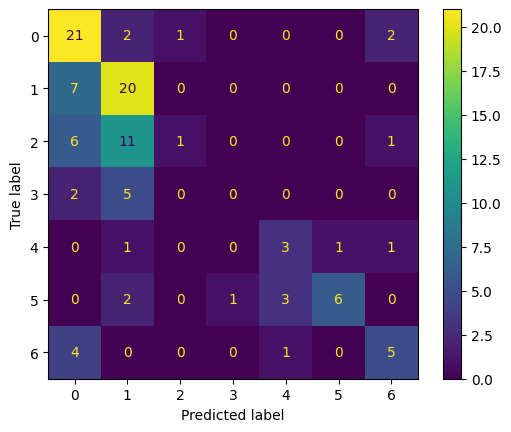

In [8]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [9]:
# Get feature importances from the trained Random Forest classifier
rf_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_importances
})

# Sort features by importance in descending order
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)

# Display the DataFrame showing feature importances
print(imp_df_sorted)

# Alternatively, you can display the unsorted DataFrame
# print(imp_df)

    Varname       Imp
9    surv6m  0.111359
4   charges  0.089890
8    surv2m  0.075874
6       sps  0.074053
7       aps  0.064435
2    num.co  0.057287
0       age  0.053287
15     pafi  0.035625
21  glucose  0.035337
10   meanbp  0.033778
14     temp  0.033656
11     wblc  0.033597
23    urine  0.032028
16      alb  0.030221
12      hrt  0.029881
19      sod  0.028197
22      bun  0.028185
20       ph  0.027673
17     bili  0.026303
13     resp  0.025974
18     crea  0.025865
25     adls  0.014148
24     adlp  0.012053
3     scoma  0.008881
1       sex  0.006724
5      race  0.005688


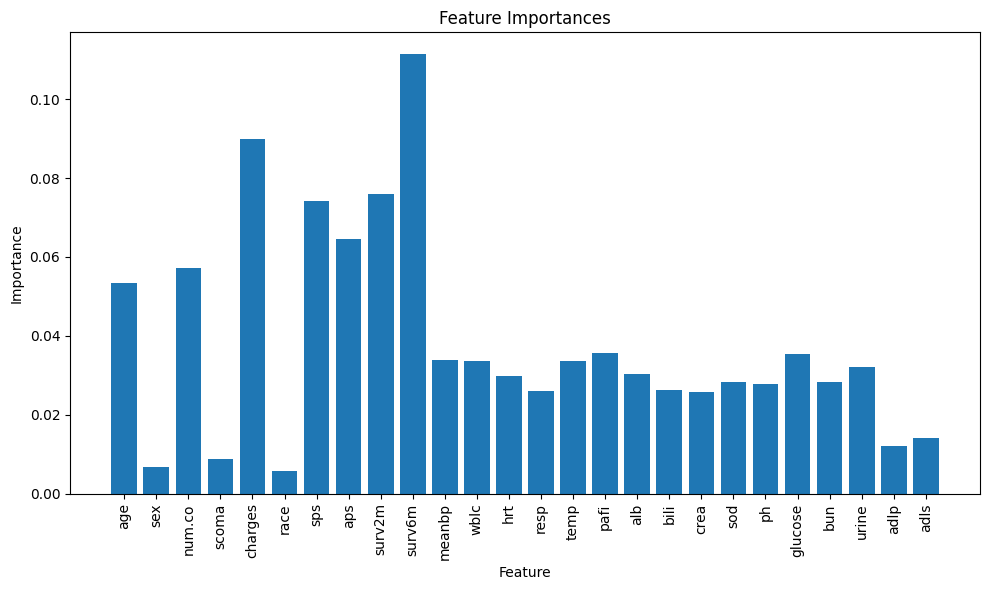

In [10]:
# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = imp_df

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), imp_df['Imp'], align="center")
plt.xticks(range(X.shape[1]),imp_df['Varname'], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Mean charges for dead vs not dead patients

In [11]:
df_cleaned = df.dropna(subset=['charges', 'death'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Mean charges for those who did not die: 62158.3036112478
Mean charges for those who did die: 58985.21661350198


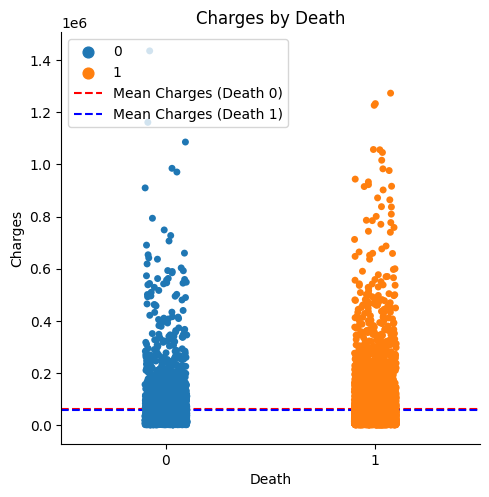

In [12]:
# Plot the categorical plot with different colors for the two groups of death
sns.catplot(x='death', y='charges', data=df_cleaned, hue='death', ci='sd', estimator='mean')

# Calculate the mean of the 'charges' column for each group of death
mean_charges_death_0 = df_cleaned[df_cleaned['death'] == 0]['charges'].mean()
mean_charges_death_1 = df_cleaned[df_cleaned['death'] == 1]['charges'].mean()

# Print mean charges for those who did not die and those who did die
print('Mean charges for those who did not die:', mean_charges_death_0)
print('Mean charges for those who did die:', mean_charges_death_1)

# Draw a horizontal line at the mean value for death 0
plt.axhline(mean_charges_death_0, color='red', linestyle='--', label='Mean Charges (Death 0)')

# Draw a horizontal line at the mean value for death 1
plt.axhline(mean_charges_death_1, color='blue', linestyle='--', label='Mean Charges (Death 1)')

# Set labels and title
plt.xlabel('Death')
plt.ylabel('Charges')
plt.title('Charges by Death')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Logistic Regression #2

In [13]:
# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

X = X.dropna(subset=['hday'])
y = y.dropna(subset=['death'])
df = pd.concat([X, y], axis=1)

# Drop NaN values from 'charges' and 'death' columns simultaneously
df_cleaned = df.dropna(subset=['hday', 'death'])

# Separate X and y again
X = df_cleaned[['hday']]
y = df_cleaned['death']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict death on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6738056013179572
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       594
           1       0.67      1.00      0.81      1227

    accuracy                           0.67      1821
   macro avg       0.34      0.50      0.40      1821
weighted avg       0.45      0.67      0.54      1821



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


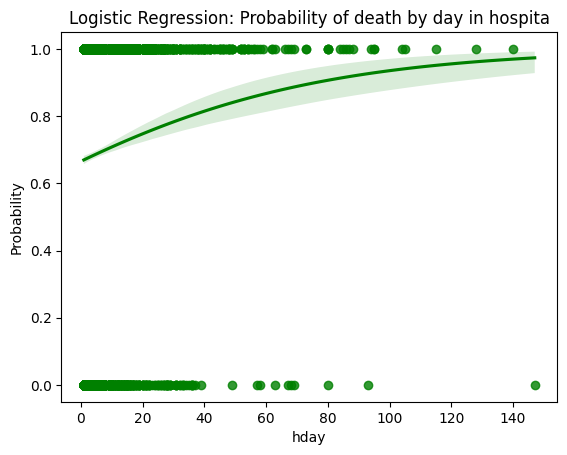

In [14]:
def ap_log_regplot(ap_X, ap_y):
    sns.regplot(ap_X, ap_y, logistic=True, color='green')
    return None

ap_log_regplot(X_train, y_train)
plt.xlabel('hday')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of death by day in hospita')
plt.show()

# Linear Regression 

In [15]:
selected_columns = ['prg6m', 'prg2m']
df_cleaned_lm = df_cleaned[selected_columns].dropna()
df_cleaned_lm

,prg6m,prg2m
0,0.250,0.50
1,0.000,0.00
2,0.500,0.75
3,0.500,0.90
4,0.900,0.90
...,...,...
9098,0.500,0.50
9100,0.512,0.80
9101,0.500,0.50
9102,0.800,0.90


In [16]:
selected_columns = ['prg6m']
X = df_cleaned_lm[selected_columns]  # Replace 'target_column' with the name of your target column
y = df_cleaned_lm['prg2m']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 0.016976889987503616
Intercept: 0.18060694628201712
Coefficients: [0.87701693]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [17]:
# Fetch dataset
support2 = fetch_ucirepo(id=880)

# Data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# Drop NaN values from 'hday' and 'death' columns simultaneously
X = X.dropna(subset=['hday'])
y = y.dropna(subset=['death'])

# Concatenate features and target variable
df = pd.concat([X, y], axis=1)

# Drop NaN values from 'hday' and 'death' columns simultaneously
df_cleaned = df.dropna(subset=['hday', 'death'])

# Separate features (X) and target variable (y) again
X = df_cleaned[['hday']]
y = df_cleaned['death']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict death on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6738056013179572
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       594
           1       0.67      1.00      0.81      1227

    accuracy                           0.67      1821
   macro avg       0.34      0.50      0.40      1821
weighted avg       0.45      0.67      0.54      1821



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [18]:
# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

X = X.dropna(subset=['prg2m'])
y = y.dropna(subset=['death'])
df = pd.concat([X, y], axis=1)

# Drop NaN values from 'charges' and 'death' columns simultaneously
df_cleaned = df.dropna(subset=['prg2m', 'death'])

# Separate X and y again
X = df_cleaned[['prg2m']]
y = df_cleaned['death']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict death on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6749329758713136
              precision    recall  f1-score   support

           0       0.51      0.10      0.17       486
           1       0.69      0.95      0.80      1006

    accuracy                           0.67      1492
   macro avg       0.60      0.53      0.48      1492
weighted avg       0.63      0.67      0.59      1492



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


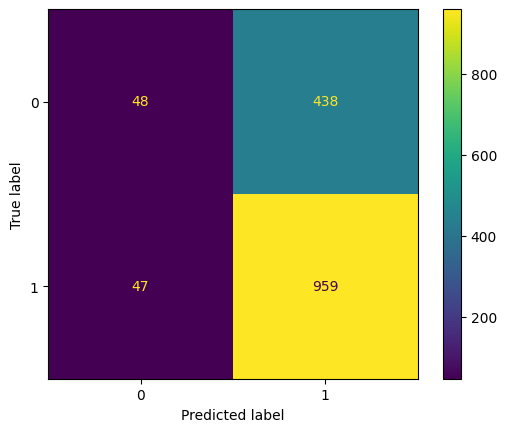

In [19]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


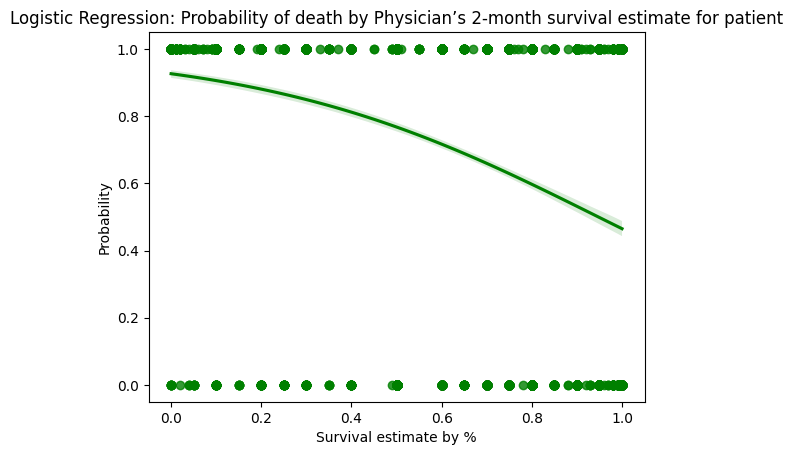

In [20]:
def ap_log_regplot(ap_X, ap_y):
    # Plot logistic regression curve
    sns.regplot(ap_X, ap_y, logistic=True, color='green')
    
    # Set labels and title
    plt.xlabel('Survival estimate by %')
    plt.ylabel('Probability')
    plt.title('Logistic Regression: Probability of death by Physician’s 2-month survival estimate for patient')
    
    # Show the plot
    plt.show()
    return None

# Call the function to plot the logistic regression curve
ap_log_regplot(X_train, y_train)

# SVM Classifier 

## Label encoding

In [21]:
# Define features (X) and target variable (y)
selected_features = ['age', 'sex', 'dzgroup', 'num.co','charges', 'hospdead']

# Drop rows with missing values and select the relevant features
df_cleaned = df_cleaned[selected_features].dropna()

# Separate features (X) and target variable (y)
X = df_cleaned[selected_features[:-1]]  # Exclude the target variable 'hospdead'
y = df_cleaned['hospdead']

# If 'sex' and 'dzgroup' are categorical variables, you can either use LabelEncoder or one-hot encoding,
# but it's better to choose one method consistently.

# If using LabelEncoder:
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['dzgroup'] = label_encoder.fit_transform(X['dzgroup'])

# If using one-hot encoding:
# df_cleaned = pd.get_dummies(df_cleaned, columns=['sex'], drop_first=True)
# df_cleaned = pd.get_dummies(df_cleaned, columns=['dzgroup'], drop_first=True)

# The rest of your code follows here...

/var/folders/5k/0qz1zbqx0cx5b4hzqlkt8fl00000gn/T/ipykernel_54368/514642302.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = label_encoder.fit_transform(X['sex'])
/var/folders/5k/0qz1zbqx0cx5b4hzqlkt8fl00000gn/T/ipykernel_54368/514642302.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dzgroup'] = label_encoder.fit_transform(X['dzgroup'])


## Transforming independent variable X

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the testing set using the same scaler fitted on the training set
X_test_scaled = scaler.transform(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


## RBF SVM

In [23]:
# Initialize SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVM classifier
svm_classifier_rbf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_rbf = svm_classifier_rbf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Accuracy: 0.7503410641200545
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1095
           1       0.62      0.04      0.07       371

    accuracy                           0.75      1466
   macro avg       0.69      0.51      0.46      1466
weighted avg       0.72      0.75      0.66      1466



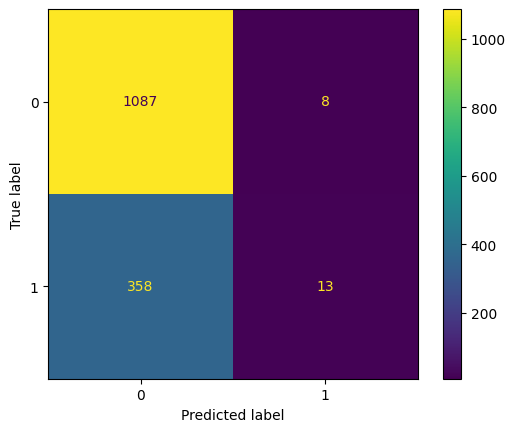

In [24]:
cmm = confusion_matrix(y_test, y_pred_rbf)
ConfusionMatrixDisplay(confusion_matrix=cmm).plot()
plt.show()

## Linear SVM

In [25]:
# Initialize SVM classifier with Linear kernel
svm_classifier_linear = SVC(kernel='linear')  

# Train the SVM classifier
svm_classifier_linear.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_linear = svm_classifier_linear.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_linear)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

Accuracy: 0.7469304229195088
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1095
           1       0.00      0.00      0.00       371

    accuracy                           0.75      1466
   macro avg       0.37      0.50      0.43      1466
weighted avg       0.56      0.75      0.64      1466



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
mat_linear = confusion_matrix(y_test, y_pred_linear)
mat_linear

array([[1095,    0],
       [ 371,    0]])

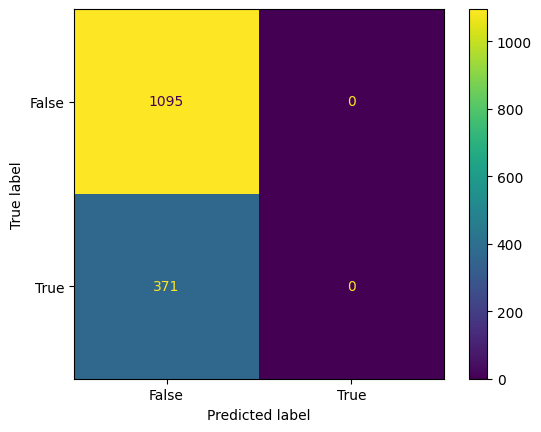

In [27]:
ConfusionMatrixDisplay(confusion_matrix = mat_linear, display_labels = [False, True]).plot()
plt.show()

## Poly SVM 

In [28]:
# Initialize SVM classifier with Poly kernel

svm_classifier_poly = SVC(kernel='poly') 

# Train the SVM classifier
svm_classifier_poly.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_poly = svm_classifier_poly.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))

Accuracy: 0.7469304229195088
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1095
           1       0.50      0.00      0.01       371

    accuracy                           0.75      1466
   macro avg       0.62      0.50      0.43      1466
weighted avg       0.68      0.75      0.64      1466



In [29]:
mat_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(mat_poly.T, square=True, annot=True, fmt='d', cbar=False)
mat_poly

array([[1094,    1],
       [ 370,    1]])

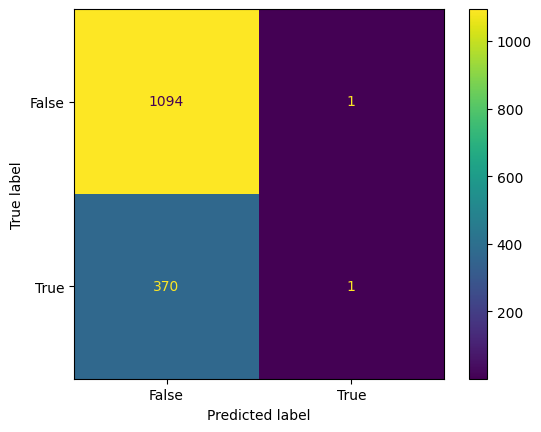

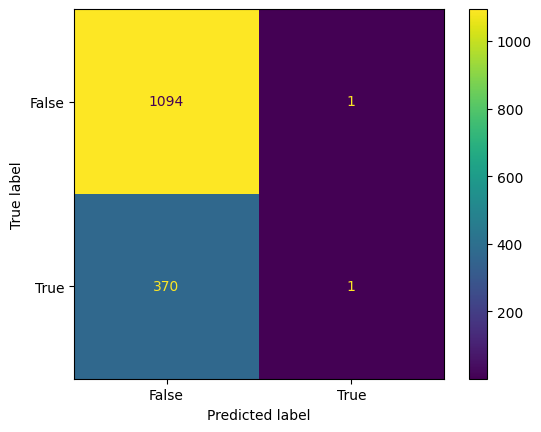

In [32]:
ConfusionMatrixDisplay(confusion_matrix = mat_poly, display_labels = [False, True]).plot()
plt.show()